In [1]:
import pandas as pd
import numpy as np

import os
import random

from numpy.random import seed

from keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For reproducible results
seed_value = 1
os.environ['PYTHONHASHSEED'] = str(seed_value)

random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
OUTPUT_PATH = './Data/output/'

### Import dataset

#### 1. Merged Elem and High School
For feature selection

In [4]:
data_merged = pd.read_csv(OUTPUT_PATH + 'CleanData_clustering.csv')
data_merged = data_merged.dropna()

### Modelling

In [5]:
training_data, testing_data = train_test_split(data_merged, test_size=0.2, random_state=42)

In [6]:
X_train = training_data.drop(['NUM_SCHOOLS'], axis=1)
y_train = training_data['NUM_SCHOOLS']

X_test = testing_data.drop(['NUM_SCHOOLS'], axis=1)
y_test = testing_data['NUM_SCHOOLS']
X_train

,SDG_Households_Electricity_Light_Pct,SDG_Households_Kerosene_Gass_Light_Pct,SDG_Households_Drinking_Owned_Faucet_Pct,SDG_Households_Drinking_Shared_Faucet_Pct,SDG_Households_Construction_Material_Concrete_Pct,SDG_Building_Tenure_Type_Owned_Pct,SDG_Type_Building_Single_Pct,SDG_Type_Worker_Man,SDG_Type_Worker_Pro,SDG_Type_Worker_Tec,SDG_Type_Worker_Cle,SDG_Type_Worker_Ser,SDG_Type_Worker_Ski,SDG_Type_Worker_Cra,SDG_Type_Worker_Pla,SDG_Type_Worker_Ele,SDG_Type_Worker_Arm,SDG_less_than_54_sqft,STUD_POPN
196,92.857143,0.000000,1.648352,1.098901,10.691824,85.714286,98.742138,23.137255,0.784314,0.000000,0.000000,1.960784,59.607843,5.490196,6.274510,2.745098,0.000000,0.000000,214.0
1310,0.452489,21.719457,0.000000,0.000000,5.022831,76.470588,99.543379,10.754717,3.396226,3.773585,4.339623,13.962264,40.377358,2.830189,0.754717,19.811321,0.000000,0.000000,294.0
1286,1.158301,14.285714,0.772201,0.000000,0.386100,96.911197,90.733591,0.531915,2.127660,0.000000,0.265957,3.457447,60.904255,0.000000,9.042553,23.670213,0.000000,0.000000,651.0
81,67.486339,32.513661,2.185792,14.480874,0.000000,6.010929,54.371585,8.200000,3.600000,0.600000,1.000000,11.400000,65.400000,2.400000,3.800000,2.800000,0.000000,0.000000,568.0
1432,60.406091,37.817259,0.000000,0.000000,2.284264,31.472081,98.984772,6.567164,2.089552,0.149254,0.298507,2.388060,77.014925,2.686567,3.582090,4.925373,0.298507,0.303030,619.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,85.454545,13.333333,0.000000,97.575758,3.636364,100.000000,100.000000,26.279863,1.023891,0.000000,1.023891,3.071672,52.559727,0.341297,8.873720,6.825939,0.000000,0.000000,243.0
1294,56.521739,38.164251,0.000000,0.483092,0.000000,5.314010,22.282609,3.103448,0.000000,0.000000,0.000000,5.172414,89.310345,0.000000,2.068966,0.344828,0.000000,0.000000,510.0
860,31.756757,25.000000,1.351351,2.027027,3.378378,14.864865,100.000000,0.709220,0.000000,0.709220,1.063830,10.638298,53.546099,0.709220,0.709220,31.914894,0.000000,31.515152,270.0
1459,0.000000,60.000000,0.000000,0.714286,0.961538,84.285714,98.076923,6.315789,1.052632,1.052632,0.000000,2.105263,74.210526,6.315789,2.105263,6.842105,0.000000,0.000000,189.0


In [7]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

In [8]:
def base_model():
    np.random.seed(1)
    model = Sequential()
    model.add(normalizer)
    model.add(Dense(4, input_dim=1, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer='adam')
    return model

In [9]:
model = base_model()
EPOCHS = 200
BATCH_SIZE = 10


callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(X_train, 
                    y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2,
                    callbacks=callback)

Epoch 1/200
98/98 [==============================] - 1s 9ms/step - loss: 3.5181 - val_loss: 2.7785
Epoch 2/200
98/98 [==============================] - 0s 1ms/step - loss: 2.8638 - val_loss: 2.0356
Epoch 3/200
98/98 [==============================] - 0s 1ms/step - loss: 2.6413 - val_loss: 1.7353
Epoch 4/200
98/98 [==============================] - 0s 1ms/step - loss: 1.9427 - val_loss: 1.5598
Epoch 5/200
98/98 [==============================] - 0s 999us/step - loss: 1.5562 - val_loss: 1.4468
Epoch 6/200
98/98 [==============================] - 0s 1ms/step - loss: 1.8757 - val_loss: 1.3748
Epoch 7/200
98/98 [==============================] - 0s 1ms/step - loss: 2.0012 - val_loss: 1.3376
Epoch 8/200
98/98 [==============================] - 0s 1ms/step - loss: 1.5290 - val_loss: 1.2932
Epoch 9/200
98/98 [==============================] - 0s 1ms/step - loss: 1.9981 - val_loss: 1.2730
Epoch 10/200
98/98 [==============================] - 0s 1ms/step - loss: 1.5865 - val_loss: 1.2453
Epoch 1

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
33,1.601759,1.139433,33
34,1.599124,1.136469,34
35,1.600069,1.143671,35
36,1.599481,1.142567,36
37,1.599521,1.138058,37


In [11]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

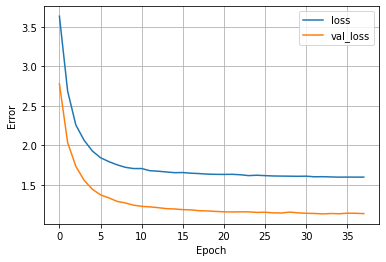

In [12]:
plot_loss(history)

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_pred_round = np.round(y_pred)

In [15]:
accuracy_score(y_test, y_pred_round)

0.5

### FEATURE IMPORTANCE

In [16]:
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasRegressor

import eli5
from eli5.sklearn import PermutationImportance

In [17]:
estimator = KerasRegressor(build_fn=base_model, nb_epoch=EPOCHS, 
                    batch_size=BATCH_SIZE,
                    validation_split=0.2)
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [18]:
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

13/13 [==============================] - 0s 748us/step - loss: 5.7036


In [19]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -4.56 (1.68) MSE


In [20]:
estimator.fit(X_train, y_train)

98/98 [==============================] - 1s 3ms/step - loss: 3.9624 - val_loss: 3.5108


In [21]:
perm = PermutationImportance(estimator, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

123/123 [==============================] - 0s 598us/step - loss: 3.5730


Weight,Feature
0.1034 ± 0.0375,SDG_Households_Electricity_Light_Pct
0.0674 ± 0.0154,SDG_Type_Worker_Cra
0.0477 ± 0.0141,SDG_Households_Kerosene_Gass_Light_Pct
0.0467 ± 0.0169,SDG_Type_Worker_Ser
0.0433 ± 0.0107,SDG_Type_Building_Single_Pct
0.0170 ± 0.0268,SDG_Building_Tenure_Type_Owned_Pct
0.0160 ± 0.0159,SDG_Type_Worker_Pla
0.0140 ± 0.0058,SDG_Type_Worker_Cle
0.0075 ± 0.0182,SDG_Type_Worker_Man
0.0020 ± 0.0147,SDG_Type_Worker_Ski
